# AUDU Bastien

# Paramètres

In [1]:
import gzip
import torch
from matplotlib import pyplot as plt
from torch import nn

## CUDA

In [2]:
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.device(device)

True


device(type='cuda')

In [3]:
batch_size=10
((data_train, label_train), (data_test, label_test)) = torch.load(gzip.open('mnist.pkl.gz'), map_location=device)
train_dataset = torch.utils.data.TensorDataset(data_train, label_train)
test_dataset = torch.utils.data.TensorDataset(data_test, label_test)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [4]:
def ExecuteModel(model_local, nb_epoch, optimizer, local_train_loader=train_loader):
	loss_func = torch.nn.MSELoss(reduction='sum')
	total_step = len(local_train_loader)
	history = []
	for epoch in range(nb_epoch):
		for x, t in local_train_loader:
			y = model_local(x)
			loss = loss_func(t, y)
			loss.backward()
			optimizer.step()
			optimizer.zero_grad()
		acc = 0.
		for x, t in test_loader:
			y = model(x)
			acc += torch.argmax(y, 1) == torch.argmax(t, 1)
		print("Essai " + str(epoch + 1) + "/" + str(nb_epoch) + " : " + "{:.1f}".format(float(acc / data_test.shape[0])*100) + "%")
		history.append(float(acc / data_test.shape[0]))
	plt.plot(history)
	plt.axis([0, nb_epoch - 1, 0, 1])
	plt.show()

### Reshape

In [5]:
## Merci Alexis
class Reshape(torch.nn.Module):
    def __init__(self, *args):
        super(Reshape, self).__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

# Perceptron
B est un tenseur de taille {10, 1} : Celui-ci contient les biais des neurones de sorties
W est un tenseur de taille {10, 784} Celui-ci contient les poids des neurones : 784 neurones d’entres et 10 neurones de sorties.
Datatrain est un tenseur de taille {63000, 784} : Matrice contenant les 63000 images d’entrainements (63000 images de 784 pixels)
Labeltrain est un tenseur de taille {63000, 784} : Matrice contenant les solutions aux images de train
Datatest est un tenseur de taille {7000, 784} : Matrice contenant les 7000 images de test ( 7000 images de 784 pixels)
Labeltest est un tenseur de taille {7000, 784} : Matrice contenant les solutions aux images de test
x va contenir les donnees lues a chaque fois.
Y contient la sortie du model
T correspond a la sortie attendu
gradiant va contenir la difference entre la sortie attendu et la sortie actuelle



# Shallow
Pour le Shallow, nous allons commencer par définir trois modèles avec des couches cachés de tailles 100, 300 et 500
Pour chaque modèle, nous allons tester plusieurs valeurs de ETA avec 5 épochs. On considèrera ici un modèle acceptable qui converge en 5 epochs ou moins.

In [6]:
class ShallowModel100(nn.Module):
	def __init__(self):
		super(ShallowModel100, self).__init__()
		self.model = torch.nn.Sequential(
			torch.nn.Linear(784, 100),
			torch.nn.ReLU(),
			torch.nn.Linear(100, 10)
		)
	def forward(self, x):
		return self.model(x)
class ShallowModel300(nn.Module):
	def __init__(self):
		super(ShallowModel300, self).__init__()
		self.model = torch.nn.Sequential(
			torch.nn.Linear(784, 300),
			torch.nn.ReLU(),
			torch.nn.Linear(300, 10)
		)
	def forward(self, x):
		return self.model(x)
class ShallowModel500(nn.Module):
	def __init__(self):
		super(ShallowModel500, self).__init__()
		self.model = torch.nn.Sequential(
			torch.nn.Linear(784, 500),
			torch.nn.ReLU(),
			torch.nn.Linear(500, 10)
		)
	def forward(self, x):
		return self.model(x)

## Couche de taille 100

Essai 1/10 : 68.7%
Essai 2/10 : 75.9%
Essai 3/10 : 79.7%
Essai 4/10 : 82.2%
Essai 5/10 : 83.2%
Essai 6/10 : 84.3%
Essai 7/10 : 85.3%
Essai 8/10 : 86.1%
Essai 9/10 : 86.7%
Essai 10/10 : 87.3%


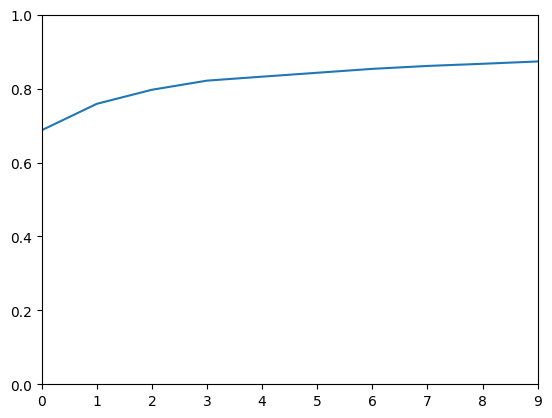

Essai 1/10 : 86.9%
Essai 2/10 : 89.6%
Essai 3/10 : 91.4%
Essai 4/10 : 92.0%
Essai 5/10 : 92.7%
Essai 6/10 : 93.3%
Essai 7/10 : 93.7%
Essai 8/10 : 94.0%
Essai 9/10 : 94.1%
Essai 10/10 : 94.4%


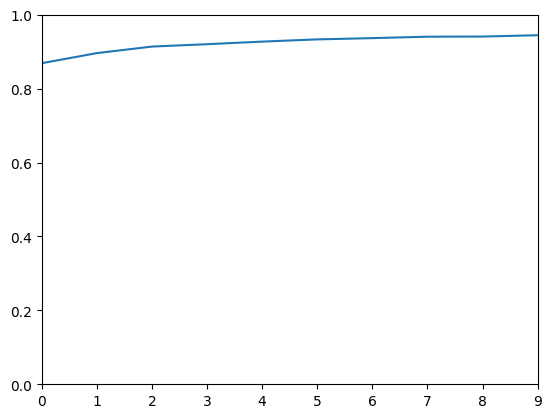

Essai 1/10 : 94.4%
Essai 2/10 : 95.6%
Essai 3/10 : 96.2%
Essai 4/10 : 96.6%
Essai 5/10 : 96.7%
Essai 6/10 : 97.0%
Essai 7/10 : 97.2%
Essai 8/10 : 97.2%
Essai 9/10 : 97.4%
Essai 10/10 : 97.5%


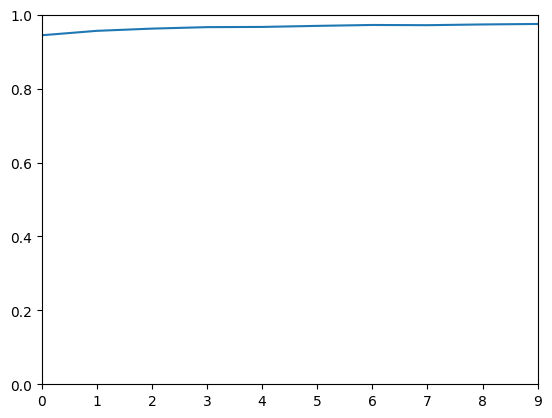

Essai 1/10 : 96.1%
Essai 2/10 : 96.5%
Essai 3/10 : 97.1%
Essai 4/10 : 97.0%
Essai 5/10 : 97.3%
Essai 6/10 : 97.5%
Essai 7/10 : 97.4%
Essai 8/10 : 97.3%
Essai 9/10 : 97.5%
Essai 10/10 : 97.4%


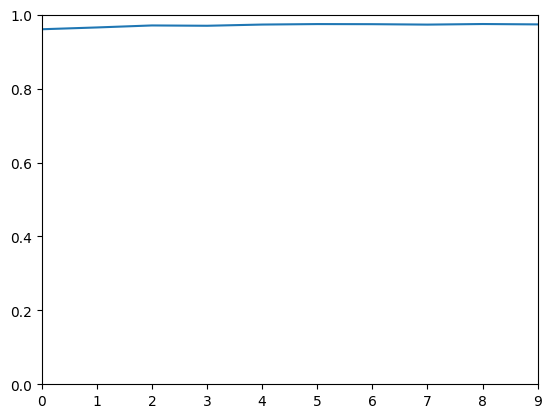

In [7]:
model = ShallowModel100().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.00001))
model = ShallowModel100().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = ShallowModel100().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = ShallowModel100().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))

On peut ici considérer que le meilleur ETA pour cette couche se trouve en 10-3

## Couche de taille 300

Essai 1/10 : 73.1%
Essai 2/10 : 79.7%
Essai 3/10 : 82.2%
Essai 4/10 : 83.5%
Essai 5/10 : 84.6%
Essai 6/10 : 85.6%
Essai 7/10 : 86.1%
Essai 8/10 : 86.8%
Essai 9/10 : 87.4%
Essai 10/10 : 87.8%


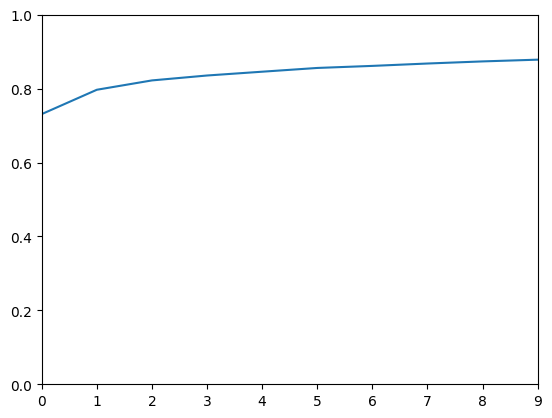

Essai 1/10 : 87.9%
Essai 2/10 : 90.8%
Essai 3/10 : 92.2%
Essai 4/10 : 92.9%
Essai 5/10 : 93.6%
Essai 6/10 : 94.2%
Essai 7/10 : 94.4%
Essai 8/10 : 94.7%
Essai 9/10 : 95.0%
Essai 10/10 : 95.3%


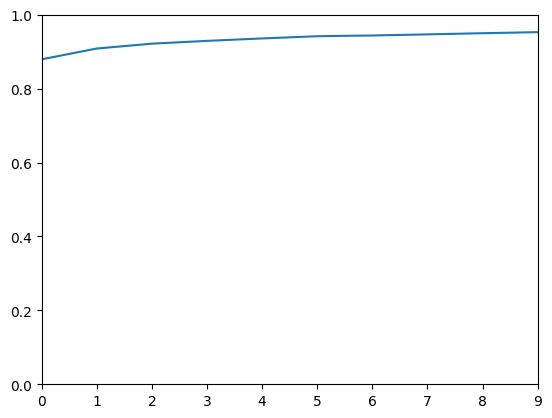

Essai 1/10 : 94.8%
Essai 2/10 : 96.4%
Essai 3/10 : 96.9%
Essai 4/10 : 97.3%
Essai 5/10 : 97.5%
Essai 6/10 : 97.6%
Essai 7/10 : 97.7%
Essai 8/10 : 97.8%
Essai 9/10 : 97.8%
Essai 10/10 : 97.9%


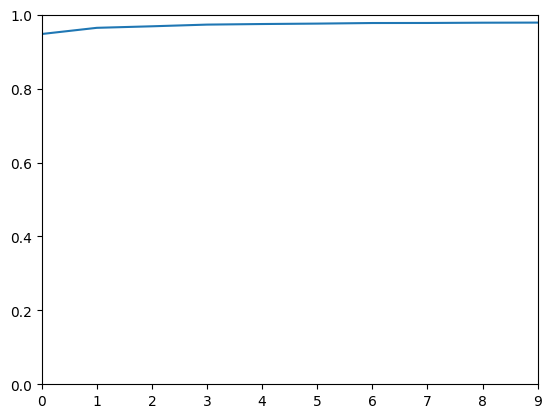

Essai 1/10 : 96.9%
Essai 2/10 : 97.5%
Essai 3/10 : 97.8%
Essai 4/10 : 98.1%
Essai 5/10 : 98.1%
Essai 6/10 : 98.1%
Essai 7/10 : 98.2%
Essai 8/10 : 98.2%
Essai 9/10 : 98.3%
Essai 10/10 : 98.3%


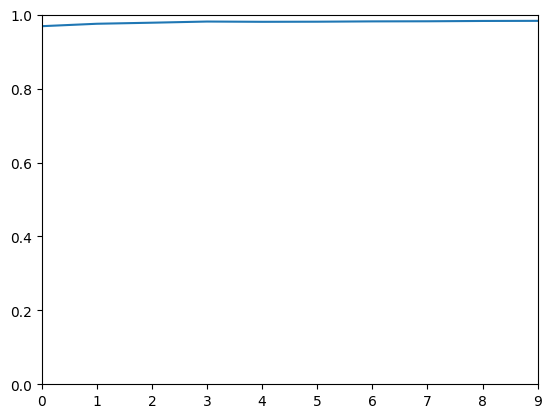

In [8]:
model = ShallowModel300().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.00001))
model = ShallowModel300().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = ShallowModel300().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = ShallowModel300().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))

On peut ici considérer que le meilleur ETA pour cette couche se trouve en 10-3

## Couche de taille 500

Essai 1/10 : 74.1%
Essai 2/10 : 79.4%
Essai 3/10 : 82.1%
Essai 4/10 : 84.0%
Essai 5/10 : 85.1%
Essai 6/10 : 85.8%
Essai 7/10 : 86.6%
Essai 8/10 : 87.3%
Essai 9/10 : 87.8%
Essai 10/10 : 88.3%


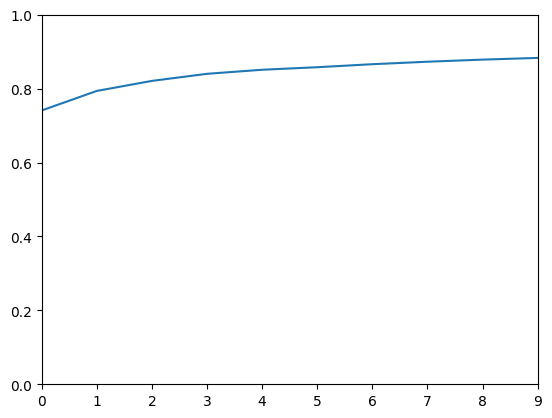

Essai 1/10 : 88.6%
Essai 2/10 : 91.6%
Essai 3/10 : 92.7%
Essai 4/10 : 93.6%
Essai 5/10 : 94.1%
Essai 6/10 : 94.6%
Essai 7/10 : 94.9%
Essai 8/10 : 95.3%
Essai 9/10 : 95.5%
Essai 10/10 : 95.6%


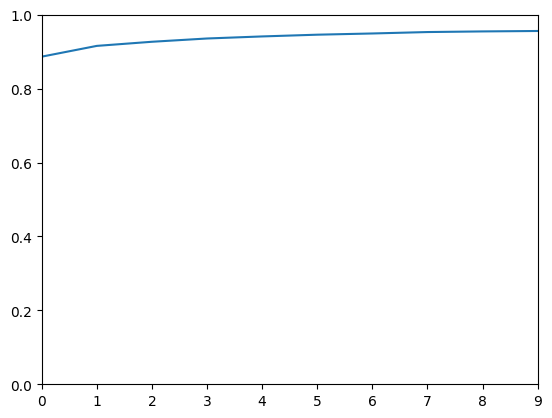

Essai 1/10 : 95.3%
Essai 2/10 : 96.5%
Essai 3/10 : 97.1%
Essai 4/10 : 97.5%
Essai 5/10 : 97.8%
Essai 6/10 : 97.9%
Essai 7/10 : 98.0%
Essai 8/10 : 98.1%
Essai 9/10 : 98.1%
Essai 10/10 : 98.1%


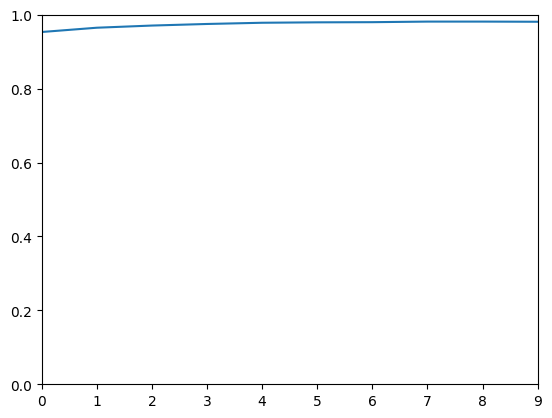

Essai 1/10 : 97.2%
Essai 2/10 : 97.4%
Essai 3/10 : 98.2%
Essai 4/10 : 98.3%
Essai 5/10 : 98.4%
Essai 6/10 : 98.4%
Essai 7/10 : 98.4%
Essai 8/10 : 98.6%
Essai 9/10 : 98.5%
Essai 10/10 : 98.5%


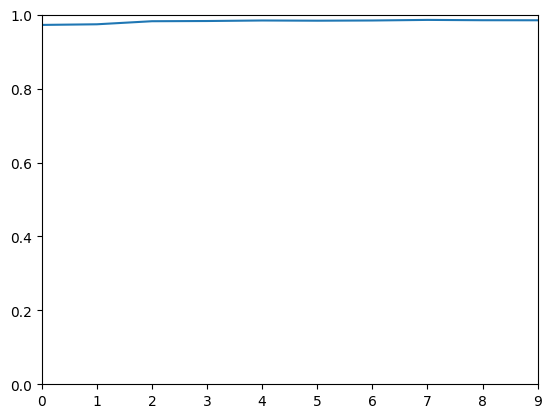

In [9]:
model = ShallowModel500().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.00001))
model = ShallowModel500().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = ShallowModel500().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = ShallowModel500().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))

On peut ici considérer que le meilleur ETA pour cette couche se trouve en 10-3

Les meilleurs résultats auront été obtenus avec une couche de taille 500 et un ETA=10-3.

# DEEP NETWORK

Pour le Deep Network, nous allons commencer avec un modèle à deux couches cachés. Nous essaieront de trouver le ETA optimal ainsi que la bonne taille de couche. Ensuite, nous tenteront d'augmenter le nombre de couches pour comparer les résultats avec la solution à deux couches. Si cela fonctionne, nous rajouterons encore une couche.

In [10]:
def init_deep_model(input):
	model = torch.nn.Sequential()
	for i in range(0, len(input) - 2):
		model.append(torch.nn.Linear(input[i], input[i + 1]))
		model.append(torch.nn.ReLU())
	model.append(torch.nn.Linear(input[len(input) - 2], input[len(input) - 1]))
	return model

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=10, bias=True)
)
Essai 1/10 : 60.1%
Essai 2/10 : 69.0%
Essai 3/10 : 73.4%
Essai 4/10 : 75.9%
Essai 5/10 : 78.1%
Essai 6/10 : 80.4%
Essai 7/10 : 81.9%
Essai 8/10 : 83.2%
Essai 9/10 : 83.9%
Essai 10/10 : 85.0%


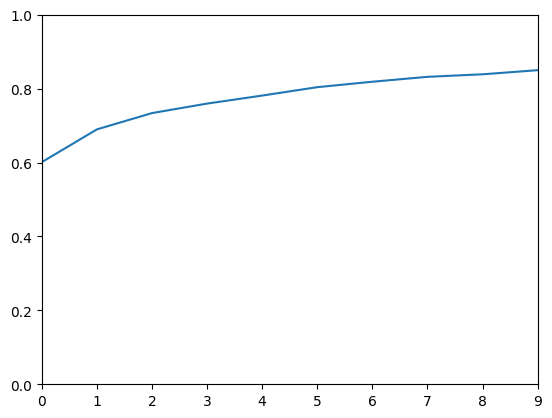

Essai 1/10 : 84.8%
Essai 2/10 : 89.3%
Essai 3/10 : 91.0%
Essai 4/10 : 92.3%
Essai 5/10 : 92.8%
Essai 6/10 : 93.5%
Essai 7/10 : 94.0%
Essai 8/10 : 94.3%
Essai 9/10 : 94.7%
Essai 10/10 : 95.0%


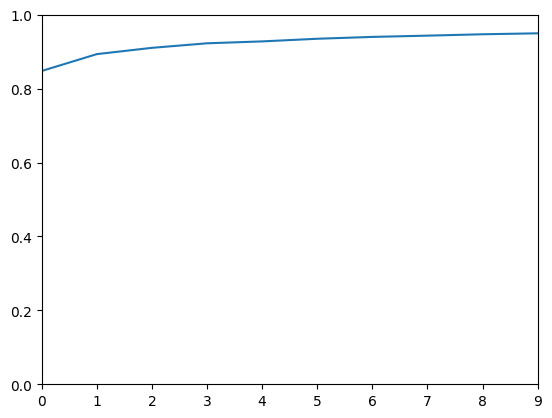

Essai 1/10 : 94.8%
Essai 2/10 : 96.6%
Essai 3/10 : 97.3%
Essai 4/10 : 97.7%
Essai 5/10 : 98.0%
Essai 6/10 : 98.1%
Essai 7/10 : 98.3%
Essai 8/10 : 98.3%
Essai 9/10 : 98.4%
Essai 10/10 : 98.5%


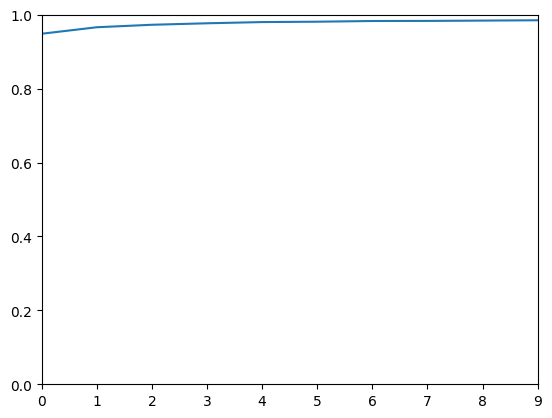

Essai 1/10 : 97.5%
Essai 2/10 : 98.1%
Essai 3/10 : 98.3%
Essai 4/10 : 98.5%
Essai 5/10 : 98.3%
Essai 6/10 : 98.5%
Essai 7/10 : 98.6%
Essai 8/10 : 98.5%
Essai 9/10 : 98.6%
Essai 10/10 : 98.7%


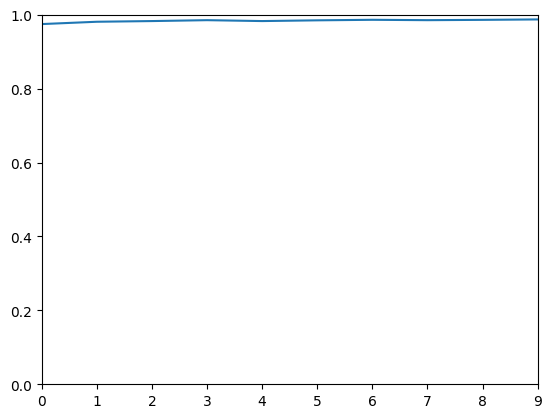

In [11]:
model = init_deep_model([784, 400, 300, 10]).cuda(device)
print(model)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.00001))
model = init_deep_model([784, 400, 300, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = init_deep_model([784, 400, 300, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = init_deep_model([784, 400, 300, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=10, bias=True)
)
Essai 1/10 : 61.2%
Essai 2/10 : 69.8%
Essai 3/10 : 73.8%
Essai 4/10 : 77.0%
Essai 5/10 : 78.9%
Essai 6/10 : 81.1%
Essai 7/10 : 82.6%
Essai 8/10 : 83.8%
Essai 9/10 : 84.7%
Essai 10/10 : 85.3%


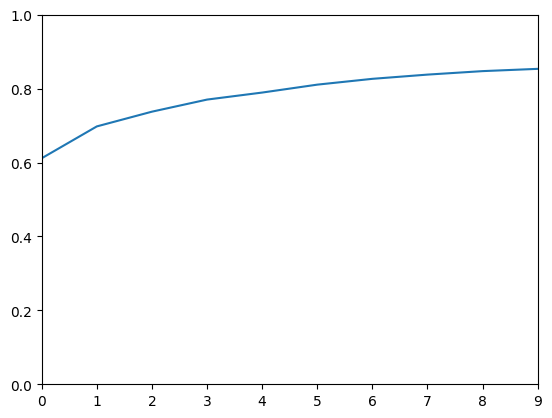

Essai 1/10 : 84.6%
Essai 2/10 : 89.5%
Essai 3/10 : 91.2%
Essai 4/10 : 92.1%
Essai 5/10 : 92.9%
Essai 6/10 : 93.6%
Essai 7/10 : 94.0%
Essai 8/10 : 94.5%
Essai 9/10 : 94.9%
Essai 10/10 : 95.2%


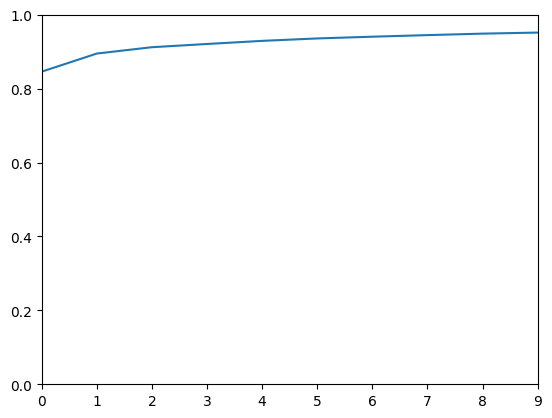

Essai 1/10 : 95.1%
Essai 2/10 : 96.5%
Essai 3/10 : 97.4%
Essai 4/10 : 97.6%
Essai 5/10 : 97.9%
Essai 6/10 : 98.0%
Essai 7/10 : 98.3%
Essai 8/10 : 98.5%
Essai 9/10 : 98.4%
Essai 10/10 : 98.5%


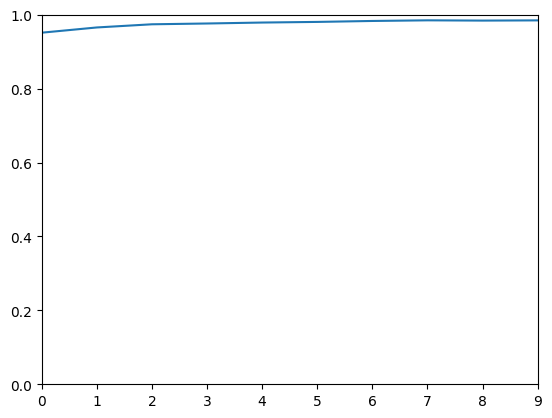

Essai 1/10 : 97.8%
Essai 2/10 : 98.2%
Essai 3/10 : 98.0%
Essai 4/10 : 98.4%
Essai 5/10 : 98.6%
Essai 6/10 : 98.7%
Essai 7/10 : 98.6%
Essai 8/10 : 98.8%
Essai 9/10 : 98.6%
Essai 10/10 : 98.7%


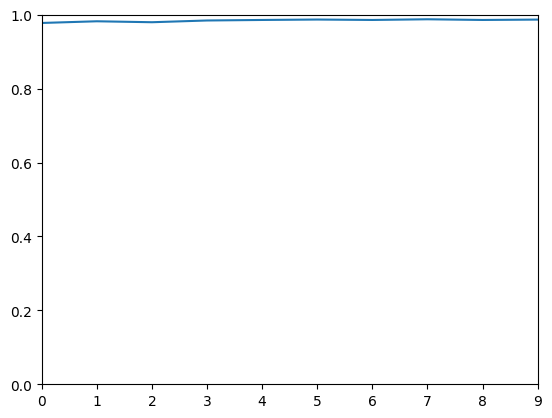

In [12]:
model = init_deep_model([784, 500, 300, 10]).cuda(device)
print(model)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.00001))
model = init_deep_model([784, 500, 300, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = init_deep_model([784, 500, 300, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = init_deep_model([784, 500, 300, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=10, bias=True)
)
Essai 1/10 : 58.3%
Essai 2/10 : 68.9%
Essai 3/10 : 72.7%
Essai 4/10 : 75.1%
Essai 5/10 : 77.5%
Essai 6/10 : 79.5%
Essai 7/10 : 81.3%
Essai 8/10 : 82.7%
Essai 9/10 : 83.6%
Essai 10/10 : 84.6%


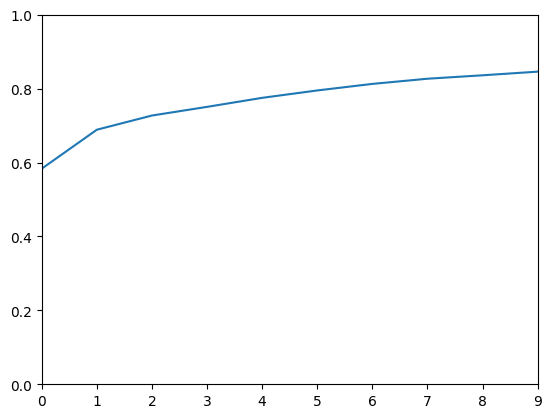

Essai 1/10 : 85.4%
Essai 2/10 : 89.2%
Essai 3/10 : 91.1%
Essai 4/10 : 92.1%
Essai 5/10 : 92.8%
Essai 6/10 : 93.4%
Essai 7/10 : 94.1%
Essai 8/10 : 94.4%
Essai 9/10 : 94.8%
Essai 10/10 : 95.0%


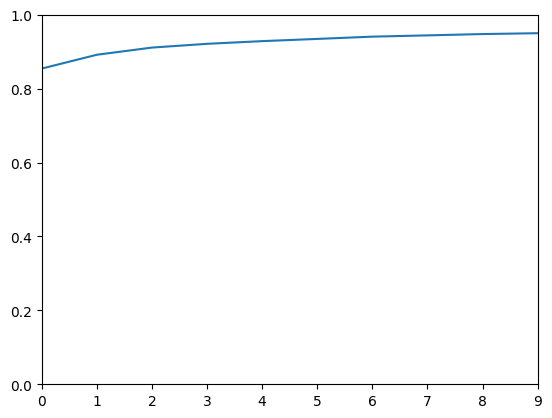

Essai 1/10 : 94.7%
Essai 2/10 : 96.6%
Essai 3/10 : 97.2%
Essai 4/10 : 97.7%
Essai 5/10 : 98.0%
Essai 6/10 : 98.2%
Essai 7/10 : 98.3%
Essai 8/10 : 98.4%
Essai 9/10 : 98.4%
Essai 10/10 : 98.5%


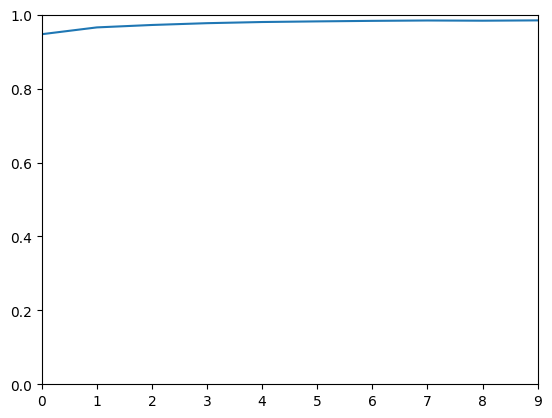

Essai 1/10 : 97.6%
Essai 2/10 : 98.2%
Essai 3/10 : 98.5%
Essai 4/10 : 98.5%
Essai 5/10 : 98.6%
Essai 6/10 : 98.7%
Essai 7/10 : 98.7%
Essai 8/10 : 98.8%
Essai 9/10 : 98.7%
Essai 10/10 : 98.8%


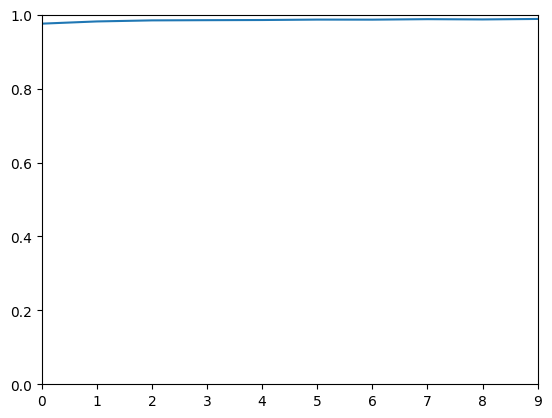

In [13]:
model = init_deep_model([784, 500, 200, 10]).cuda(device)
print(model)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.00001))
model = init_deep_model([784, 500, 200, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = init_deep_model([784, 500, 200, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = init_deep_model([784, 500, 200, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))

On remarque ici que les résultats sont similaires malgré les taille des couches de neurones intermédiaires. Cependant, on remarque que l'ETA optimal est passé de 10-3 à 10-2.
Essayons de rajouter une couche caché. On essaiera de répartir les tailles des couches.

Sequential(
  (0): Linear(in_features=784, out_features=600, bias=True)
  (1): ReLU()
  (2): Linear(in_features=600, out_features=400, bias=True)
  (3): ReLU()
  (4): Linear(in_features=400, out_features=200, bias=True)
  (5): ReLU()
  (6): Linear(in_features=200, out_features=10, bias=True)
)
Essai 1/10 : 34.5%
Essai 2/10 : 55.9%
Essai 3/10 : 62.5%
Essai 4/10 : 65.7%
Essai 5/10 : 68.0%
Essai 6/10 : 69.8%
Essai 7/10 : 71.8%
Essai 8/10 : 73.6%
Essai 9/10 : 75.9%
Essai 10/10 : 77.5%


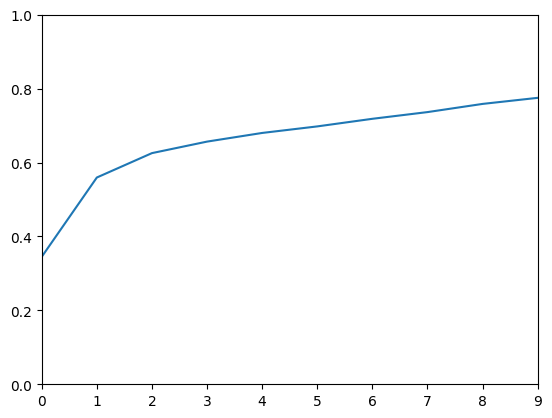

Essai 1/10 : 76.5%
Essai 2/10 : 87.0%
Essai 3/10 : 90.5%
Essai 4/10 : 91.5%
Essai 5/10 : 92.4%
Essai 6/10 : 93.0%
Essai 7/10 : 93.6%
Essai 8/10 : 94.0%
Essai 9/10 : 94.4%
Essai 10/10 : 94.9%


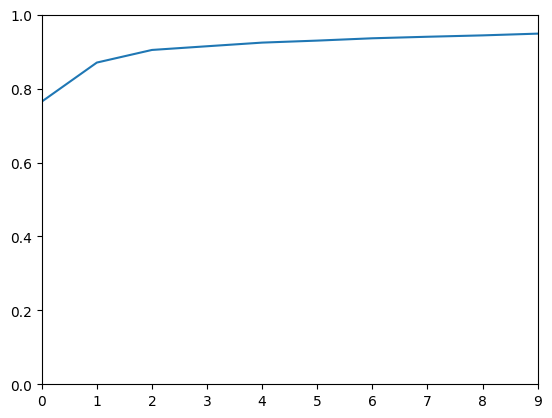

Essai 1/10 : 94.7%
Essai 2/10 : 96.6%
Essai 3/10 : 97.5%
Essai 4/10 : 97.6%
Essai 5/10 : 98.0%
Essai 6/10 : 98.2%
Essai 7/10 : 98.3%
Essai 8/10 : 98.3%
Essai 9/10 : 98.4%
Essai 10/10 : 98.6%


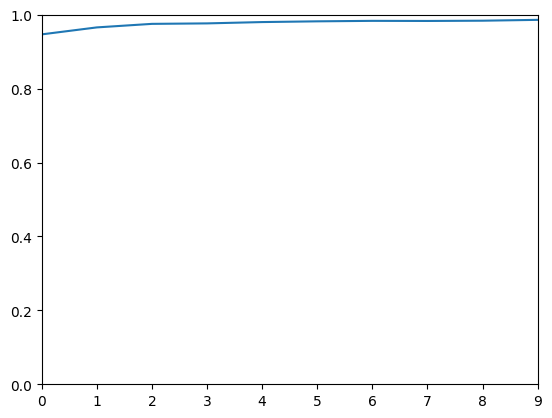

Essai 1/10 : 97.0%
Essai 2/10 : 98.3%
Essai 3/10 : 98.2%
Essai 4/10 : 98.5%
Essai 5/10 : 98.5%
Essai 6/10 : 98.8%
Essai 7/10 : 98.6%
Essai 8/10 : 98.8%
Essai 9/10 : 98.8%
Essai 10/10 : 98.9%


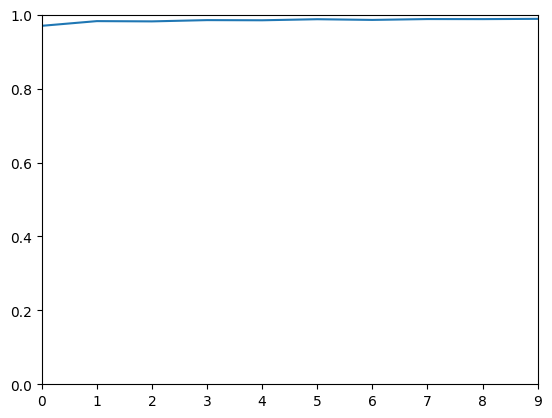

In [14]:
model = init_deep_model([784, 600, 400, 200, 10]).cuda(device)
print(model)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.00001))
model = init_deep_model([784, 600, 400, 200, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = init_deep_model([784, 600, 400, 200, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = init_deep_model([784, 600, 400, 200, 10]).cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))

Avec trois couches cachés, on semble convergé un peu en dessous des 99%. La différence est donc négligeable. Le modèle optimale restera celui à deux couches cachés et un ETA=10-2 et c1=500, c2=300 car à résultat similaire, le temps d'exécution sera réduit par rapport à un modèle à trois couches cachés.

On va essayer de changer la taille des batchs

Essai 1/10 : 95.0%
Essai 2/10 : 96.4%
Essai 3/10 : 97.2%
Essai 4/10 : 97.6%
Essai 5/10 : 98.0%
Essai 6/10 : 98.1%
Essai 7/10 : 98.2%
Essai 8/10 : 98.1%
Essai 9/10 : 98.3%
Essai 10/10 : 98.4%


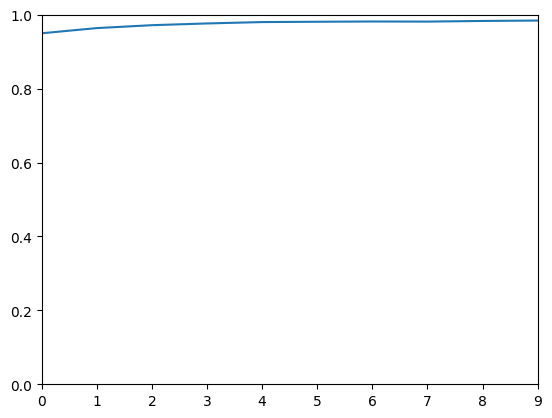

Essai 1/10 : 94.9%
Essai 2/10 : 96.4%
Essai 3/10 : 97.3%
Essai 4/10 : 97.6%
Essai 5/10 : 97.9%
Essai 6/10 : 98.1%
Essai 7/10 : 98.3%
Essai 8/10 : 98.4%
Essai 9/10 : 98.4%
Essai 10/10 : 98.4%


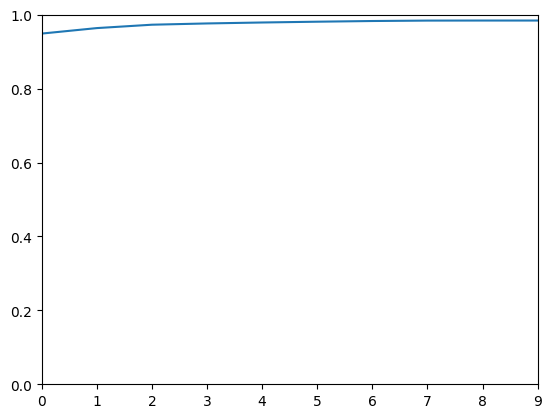

In [15]:
model = init_deep_model([784, 500, 300, 10]).cuda(device)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=5, shuffle=True)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001), local_train_loader=train_loader)

model = init_deep_model([784, 500, 300, 10]).cuda(device)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=15, shuffle=True)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001), local_train_loader=train_loader)

# CNN

Etant donné les résultats données par le CNN, nous allons rester sur une configuration avec trois couches cachés.


In [16]:
class CNNModel(nn.Module):
	def __init__(self):
		super(CNNModel, self).__init__()
		self.model = torch.nn.Sequential(
			# Convolution
			Reshape(-1, 1, 28, 28),
			torch.nn.Conv2d(1, 3, 5),
			torch.nn.ReLU(),
			torch.nn.Conv2d(3, 6, 5),
			torch.nn.ReLU(),
			torch.nn.Conv2d(6, 9, 5),

			#
			Reshape(-1, 2304),
			torch.nn.Linear(2304, 1000),
			torch.nn.ReLU(),
			torch.nn.Linear(1000, 500),
			torch.nn.ReLU(),
			torch.nn.Linear(500, 10),
		)
	def forward(self, x):
		return self.model(x)

CNNModel(
  (model): Sequential(
    (0): Reshape()
    (1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (2): ReLU()
    (3): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(6, 9, kernel_size=(5, 5), stride=(1, 1))
    (6): Reshape()
    (7): Linear(in_features=2304, out_features=1000, bias=True)
    (8): ReLU()
    (9): Linear(in_features=1000, out_features=500, bias=True)
    (10): ReLU()
    (11): Linear(in_features=500, out_features=10, bias=True)
  )
)
Essai 1/10 : 93.6%
Essai 2/10 : 95.7%
Essai 3/10 : 96.7%
Essai 4/10 : 97.2%
Essai 5/10 : 97.4%
Essai 6/10 : 97.7%
Essai 7/10 : 97.9%
Essai 8/10 : 98.0%
Essai 9/10 : 98.0%
Essai 10/10 : 98.2%


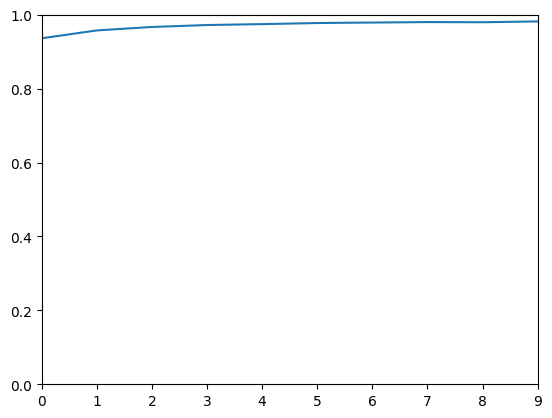

Essai 1/10 : 97.9%
Essai 2/10 : 98.5%
Essai 3/10 : 98.8%
Essai 4/10 : 99.0%
Essai 5/10 : 99.0%
Essai 6/10 : 99.2%
Essai 7/10 : 99.1%
Essai 8/10 : 99.2%
Essai 9/10 : 99.2%
Essai 10/10 : 99.3%


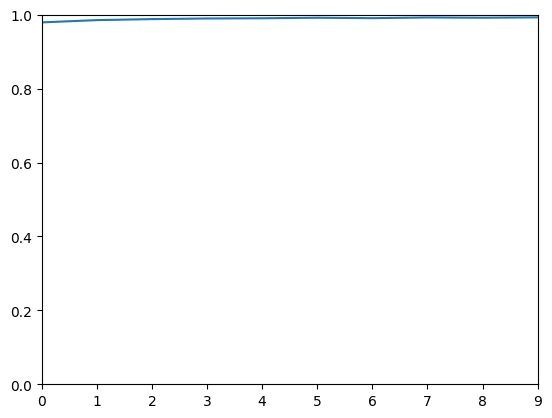

Essai 1/10 : 98.5%
Essai 2/10 : 98.7%
Essai 3/10 : 99.1%
Essai 4/10 : 99.1%
Essai 5/10 : 99.1%
Essai 6/10 : 99.2%
Essai 7/10 : 99.2%
Essai 8/10 : 99.2%
Essai 9/10 : 99.2%
Essai 10/10 : 99.2%


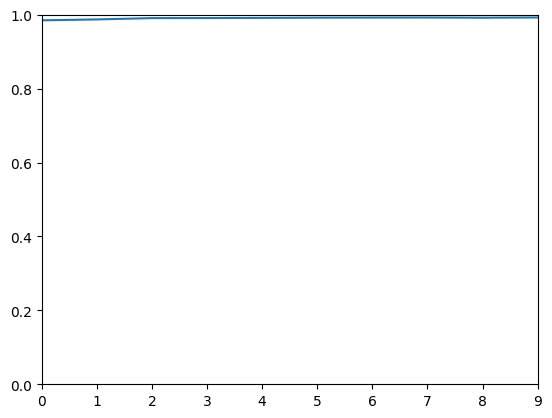

In [17]:
model = CNNModel().cuda(device)
print(model)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.0001))
model = CNNModel().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.001))
model = CNNModel().cuda(device)
ExecuteModel(model_local=model, nb_epoch=10, optimizer=torch.optim.SGD(model.parameters(), lr=0.01))